In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
holders_anti = ["EE:B4:AF:3F:05:80", # Badge 262
                "FF:0C:74:ED:C4:CD", # Badge 263
                "EC:FB:84:DE:35:4A", # Badge 264
                "C5:85:B9:18:8D:C3", # Badge 265
                "CB:5C:4B:7C:43:81", # Badge 266
                "E1:07:CE:CE:52:BE"] # Badge 267

In [5]:
holders_noanti = ["F1:4E:55:EA:ED:A4", # Badge 210
                  "E8:FA:0D:3C:01:82", # Badge 211
                  "C2:57:36:E6:71:6E", # Badge 212
                  "D9:86:6F:AF:E8:90", # Badge 213
                  "C1:96:24:5B:EB:97", # Badge 214
                  "C8:2F:80:DA:26:94"] # Badge 215

# Open up the test logs and load into dataframes

In [72]:
def load(filename):
    raw = pd.read_csv(filename)
    raw = raw.loc[(raw['RSSI']>-70)]

    at = raw.loc[raw['MAC'].isin(holders_anti)]  # Antistatic Transmitters
    nat = raw.loc[raw['MAC'].isin(holders_noanti)]  # No-Antistatic Transmitters
    allt = pd.concat([at, nat]).sort_values(by="DATETIME")  # All Transmitters (removed unwanted MACs)
    
    return (allt, at, nat)

In [73]:
# Antistatic Receivers
df_ar2, df_ar2at, df_ar2nat = load('logs_antistatic/BLE_range_test_2ft_antistatic_CSV/000.csv')
df_ar4, df_ar4at, df_ar4nat = load('logs_antistatic/BLE_range_test_4ft_antistatic_CSV/000.csv')
df_ar6, df_ar6at, df_ar6nat = load('logs_antistatic/BLE_range_test_6ft_antistatic_CSV/000.csv')
df_ar8, df_ar8at, df_ar8nat = load('logs_antistatic/BLE_range_test_8ft_antistatic_CSV/000.csv')
df_ar10, df_ar10at, df_ar10nat = load('logs_antistatic/BLE_range_test_10ft_antistatic_CSV/000.csv')

In [74]:
# No-Antistatic Receivers
df_nar2, df_nar2at, df_nar2nat = load('logs_noantistatic/BLE_range_test_2ft_noantistatic_CSV/000.csv')
df_nar4, df_nar4at, df_nar4nat = load('logs_noantistatic/BLE_range_test_4ft_noantistatic_CSV/000.csv')
df_nar6, df_nar6at, df_nar6nat = load('logs_noantistatic/BLE_range_test_6ft_noantistatic_CSV/000.csv')
df_nar8, df_nar8at, df_nar8nat = load('logs_noantistatic/BLE_range_test_8ft_noantistatic_CSV/000.csv')
df_nar10, df_nar10at, df_nar10nat = load('logs_noantistatic/BLE_range_test_10ft_noantistatic_CSV/000.csv')

# make histograms with rssi vs count

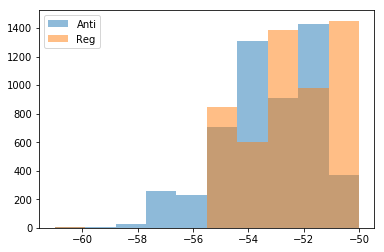

In [75]:
plt.hist(df_ar2at["RSSI"], bins = 10, alpha=0.5, label='Anti')
plt.hist(df_ar2nat["RSSI"], bins = 10, alpha=0.5, label='Reg')
plt.legend(loc='upper left')
plt.show()

Regular Holder on both Transmitters / Receiver

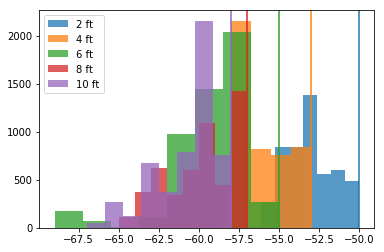

In [102]:
plt.hist(df_nar2nat["RSSI"], bins = 8, alpha=0.75, label='2 ft')
plt.axvline(x=df_nar2nat.max()["RSSI"], color='C0')
plt.hist(df_nar4nat["RSSI"], bins = 8, alpha=0.75, label='4 ft')
plt.axvline(x=df_nar4nat.max()["RSSI"], color='C1')
plt.hist(df_nar6nat["RSSI"], bins = 8, alpha=0.75, label='6 ft')
plt.axvline(x=df_nar6nat.max()["RSSI"], color='C2')
plt.hist(df_nar8nat["RSSI"], bins = 8, alpha=0.75, label='8 ft')
plt.axvline(x=df_nar8nat.max()["RSSI"], color='C3')
plt.hist(df_nar10nat["RSSI"], bins = 8, alpha=0.75, label='10 ft')
plt.axvline(x=df_nar10nat.max()["RSSI"], color='C4')
plt.legend(loc='upper left')
plt.show()

Antistatic Holder on both Transmitters / Receiver

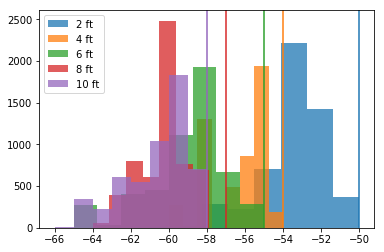

In [103]:
plt.hist(df_ar2at["RSSI"], bins = 8, alpha=0.75, label='2 ft')
plt.axvline(x=df_ar2at.max()["RSSI"], color='C0')
plt.hist(df_ar4at["RSSI"], bins = 8, alpha=0.75, label='4 ft')
plt.axvline(x=df_ar4at.max()["RSSI"], color='C1')
plt.hist(df_ar6at["RSSI"], bins = 8, alpha=0.75, label='6 ft')
plt.axvline(x=df_ar6at.max()["RSSI"], color='C2')
plt.hist(df_ar8at["RSSI"], bins = 8, alpha=0.75, label='8 ft')
plt.axvline(x=df_ar8at.max()["RSSI"], color='C3')
plt.hist(df_ar10at["RSSI"], bins = 8, alpha=0.75, label='10 ft')
plt.axvline(x=df_ar10at.max()["RSSI"], color='C4')
plt.legend(loc='upper left')
plt.show()